<h3>Cambiando el Parámetro Ventana</h3>

En la lección anterior se hizo un backtest de los datos con una ventana de 3.  
Ahora vamos a variar la ventana con los valores 1, 2, 5 y 10 y a realizar el backtest para cada valor de una forma visualmente. Para ello vamos a realizar una gráfica donde se muestran todas las estrategias.

En primer lugar importamos los datos (intraday.csv) y se le aplican algunas operaciones tal com se hizo antes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [4]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time" )

In [5]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [6]:
data["returns"] = np.log(data.div(data.shift(1)))

In [7]:
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [8]:
# se eliminan los valores nulos
data.dropna(inplace=True)
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


Ahora se inicializa una lista con las columnas que vamos a graficar y en donde la primera estrategia es
Buy and Hold (B/H) de tal manera que estos son los rendimientos de B/H.
A continuación se agregan dos columnas para cada estrategia contraria y luego vamos a iterar de una lista donde tenemos ventanas !, 2, 3, 5 y 10; de tal manera que tenemos 5 estrategias contrarias diferentes.


In [9]:
to_plot = ["returns"]

In [10]:
for w in [1, 2, 3, 5, 10]:
    data["position{}".format(w)] = -np.sign(data["returns"].rolling(w).mean())
    data["strategy{}".format(w)] = data["position{}".format(w)].shift(1) * data["returns"]
    to_plot.append("strategy{}".format(w))

In [11]:
data

,price,returns,position1,strategy1,position2,strategy2,position3,strategy3,position5,strategy5,position10,strategy10
time,,,,,,,,,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,1.0,0.002169,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,0.001129,1.0,-0.001129,-1.0,NaN,NaN,NaN,NaN,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,-1.0,-0.000921,1.0,0.000921,NaN,NaN,NaN,NaN
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0,0.000718,1.0,-0.000718,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138


In [12]:
to_plot

['returns', 'strategy1', 'strategy2', 'strategy3', 'strategy5', 'strategy10']

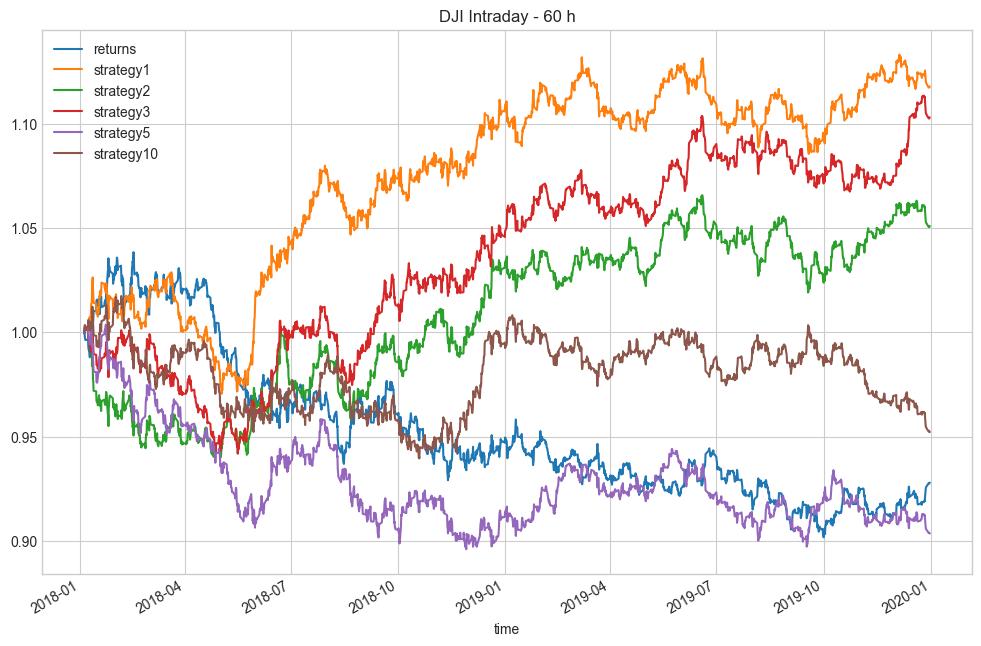

In [13]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(figsize = (12,8))
plt.title("DJI Intraday - 60 h", fontsize = 12)
plt.show() 

En la gráfica anterior se muestran los comportamientos de la estrategia de B/H (columna returns) y las estrategias contrarias para los valores de ventana 1, 2, 3, 5 y 10.

Para cada una de estas columnas se ha calculado los rendimientos acumulados y el antilogaritmo (np.exp)

La línea azul representa la estrategia B/H que empieza en $1 y finaliza en aprox $0.94. 

Las 2 mejores estrategias corresponden a las ventanas 1 y 3 (líneas naranja y roja) que finalizan con valores por encima de $1.1.  

Es importante resaltar que la estrategia contraria con una ventana de 5 tiene un rendimiento peor que B/H.  
Consecuentemente, podemos decir que la estrategia contraria es muy sensible al valor de la ventana y por lo tanto esta estrategia bo es muy confiable. Además, hay que mencionar que aquí no se han tomado en cuenta los costos asociados al trading.

Cuando realizamos trading bien sea con estrategia simples de momentum o contraria se requiere realizar muchos tradings, de tal manera que se cambian muchas verces las posiciones y esto genera altos costos de trading los cuales definitivamente, deben ser tomados en cuenta cuando realizamos el backtesting de estas estrategias.  

Esto se va hacer en la próxima lección.
